In [1]:
import pandas as pd
import datetime 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import dtale
import re
import seaborn as sns

%matplotlib inline

In [18]:
smileon = pd.read_csv('../data/smileon_visualready.csv')
smileon2 = pd.read_csv('../data/smileon_edited.csv')

In [3]:
smileon.head()

,patient_id,s_difficulty_eating,s_difficulty_speaking,s_drymouth,s_felt_anxiety,s_felt_embarrassed,s_avoided_smiling,s_pain_discomfort,imaging,plaque_removal,...,tooth_extractions_removals,sinus_perforation_closure,biopsy,alveoloplasty,excision_lesions,abscess_drain,pericoronalgingiva_excision,surgery_fibroustuberosity_reduction,emergencytreatment_dentalpain,occlusal_adjustment
0,2384106,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2384833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2384897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2384922,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
smileon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10709 entries, 0 to 10708
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           10709 non-null  int64  
 1   s_difficulty_eating                  10709 non-null  float64
 2   s_difficulty_speaking                10709 non-null  float64
 3   s_drymouth                           10709 non-null  float64
 4   s_felt_anxiety                       10709 non-null  float64
 5   s_felt_embarrassed                   10709 non-null  float64
 6   s_avoided_smiling                    10709 non-null  float64
 7   s_pain_discomfort                    10709 non-null  float64
 8   imaging                              10709 non-null  float64
 9   plaque_removal                       10709 non-null  float64
 10  sealant                              10709 non-null  float64
 11  medicament                  

SETTING GRAPH SIZE/COLOR/STYLE DEFAULTS 

In [65]:
#for consistency:  teammate Robert uses this foundation for all his seaborn graphics:

sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.5, style='darkgrid')

In [74]:
#Group project specified color palette:

smileplus_palette = ["#980000", "#FBF9F9", "#18425A","507184","0D94BF"]
color_codes_wanted = ['red', 'white', 'dark blue','light blue', 'bright blue']

c = lambda x: smileplus_palette[color_codes_wanted.index(x)]

#sns.set_palette(palette = smileplus_palette)

CREATING SPECIFIC DFS FOR SUBSETS OF DATA FOR GRAPHING

Data only for patients reporting "difficulty eating"

In [6]:
smileon_eating = smileon[smileon['s_difficulty_eating']==1]
smileon_eating.head()
smileon_eating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 0 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           2590 non-null   int64  
 1   s_difficulty_eating                  2590 non-null   float64
 2   s_difficulty_speaking                2590 non-null   float64
 3   s_drymouth                           2590 non-null   float64
 4   s_felt_anxiety                       2590 non-null   float64
 5   s_felt_embarrassed                   2590 non-null   float64
 6   s_avoided_smiling                    2590 non-null   float64
 7   s_pain_discomfort                    2590 non-null   float64
 8   imaging                              2590 non-null   float64
 9   plaque_removal                       2590 non-null   float64
 10  sealant                              2590 non-null   float64
 11  medicament                   

Data only for patients reporting "difficulty speaking"

In [8]:
smileon_speaking = smileon[smileon['s_difficulty_speaking']==1]
smileon_speaking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 6 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1156 non-null   int64  
 1   s_difficulty_eating                  1156 non-null   float64
 2   s_difficulty_speaking                1156 non-null   float64
 3   s_drymouth                           1156 non-null   float64
 4   s_felt_anxiety                       1156 non-null   float64
 5   s_felt_embarrassed                   1156 non-null   float64
 6   s_avoided_smiling                    1156 non-null   float64
 7   s_pain_discomfort                    1156 non-null   float64
 8   imaging                              1156 non-null   float64
 9   plaque_removal                       1156 non-null   float64
 10  sealant                              1156 non-null   float64
 11  medicament                   

Data only for patients reporting "dry mouth"

In [10]:
smileon_drymouth = smileon[smileon['s_drymouth']==1]
smileon_drymouth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1750 non-null   int64  
 1   s_difficulty_eating                  1750 non-null   float64
 2   s_difficulty_speaking                1750 non-null   float64
 3   s_drymouth                           1750 non-null   float64
 4   s_felt_anxiety                       1750 non-null   float64
 5   s_felt_embarrassed                   1750 non-null   float64
 6   s_avoided_smiling                    1750 non-null   float64
 7   s_pain_discomfort                    1750 non-null   float64
 8   imaging                              1750 non-null   float64
 9   plaque_removal                       1750 non-null   float64
 10  sealant                              1750 non-null   float64
 11  medicament                   

Data only for patients reporting "felt anxiety"

In [12]:
smileon_anxiety = smileon[smileon['s_felt_anxiety']==1]
smileon_anxiety.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1420 non-null   int64  
 1   s_difficulty_eating                  1420 non-null   float64
 2   s_difficulty_speaking                1420 non-null   float64
 3   s_drymouth                           1420 non-null   float64
 4   s_felt_anxiety                       1420 non-null   float64
 5   s_felt_embarrassed                   1420 non-null   float64
 6   s_avoided_smiling                    1420 non-null   float64
 7   s_pain_discomfort                    1420 non-null   float64
 8   imaging                              1420 non-null   float64
 9   plaque_removal                       1420 non-null   float64
 10  sealant                              1420 non-null   float64
 11  medicament                   

Data only for patients reporting "felt embarrassed"

In [13]:
smileon_embarrassed = smileon[smileon['s_felt_embarrassed']==1]
smileon_embarrassed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 6 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1721 non-null   int64  
 1   s_difficulty_eating                  1721 non-null   float64
 2   s_difficulty_speaking                1721 non-null   float64
 3   s_drymouth                           1721 non-null   float64
 4   s_felt_anxiety                       1721 non-null   float64
 5   s_felt_embarrassed                   1721 non-null   float64
 6   s_avoided_smiling                    1721 non-null   float64
 7   s_pain_discomfort                    1721 non-null   float64
 8   imaging                              1721 non-null   float64
 9   plaque_removal                       1721 non-null   float64
 10  sealant                              1721 non-null   float64
 11  medicament                   

Data only for patients reporting "avoided smiling"

In [79]:
smileon_smiling = smileon[smileon['s_avoided_smiling']==1]
smileon_smiling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859 entries, 6 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1859 non-null   int64  
 1   s_difficulty_eating                  1859 non-null   float64
 2   s_difficulty_speaking                1859 non-null   float64
 3   s_drymouth                           1859 non-null   float64
 4   s_felt_anxiety                       1859 non-null   float64
 5   s_felt_embarrassed                   1859 non-null   float64
 6   s_avoided_smiling                    1859 non-null   float64
 7   s_pain_discomfort                    1859 non-null   float64
 8   imaging                              1859 non-null   float64
 9   plaque_removal                       1859 non-null   float64
 10  sealant                              1859 non-null   float64
 11  medicament                   

Data only for patients reporting "felt pain or discomfort"

In [14]:
smileon_pain = smileon[smileon['s_pain_discomfort']==1]
smileon_pain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2217 entries, 0 to 10704
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           2217 non-null   int64  
 1   s_difficulty_eating                  2217 non-null   float64
 2   s_difficulty_speaking                2217 non-null   float64
 3   s_drymouth                           2217 non-null   float64
 4   s_felt_anxiety                       2217 non-null   float64
 5   s_felt_embarrassed                   2217 non-null   float64
 6   s_avoided_smiling                    2217 non-null   float64
 7   s_pain_discomfort                    2217 non-null   float64
 8   imaging                              2217 non-null   float64
 9   plaque_removal                       2217 non-null   float64
 10  sealant                              2217 non-null   float64
 11  medicament                   

Data - how many patients reported each of the 7 problems

In [38]:
smileon_problems=smileon[['patient_id','s_difficulty_eating','s_difficulty_speaking','s_drymouth','s_felt_anxiety','s_felt_embarrassed','s_avoided_smiling','s_pain_discomfort']]
smileon_problems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10709 entries, 0 to 10708
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             10709 non-null  int64  
 1   s_difficulty_eating    10709 non-null  float64
 2   s_difficulty_speaking  10709 non-null  float64
 3   s_drymouth             10709 non-null  float64
 4   s_felt_anxiety         10709 non-null  float64
 5   s_felt_embarrassed     10709 non-null  float64
 6   s_avoided_smiling      10709 non-null  float64
 7   s_pain_discomfort      10709 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 669.4 KB


Data - how many visits did people in the program make on average?

In [22]:
eligible=smileon2[smileon2['ve_eligibility']!='No']
patientcounts=eligible['patient_id'].value_counts()
patientcounts.describe()
#average number of visits per patient - 5.4

count    10711.000000
mean         5.393334
std          4.695309
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         63.000000
Name: patient_id, dtype: float64

STARTING VISUALIZATIONS 

In [39]:
#Who approached SmileOn for help - what problems were they having?
#smileon_problems

smileon_problems.head()

,patient_id,s_difficulty_eating,s_difficulty_speaking,s_drymouth,s_felt_anxiety,s_felt_embarrassed,s_avoided_smiling,s_pain_discomfort
0,2384106,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2384744,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2384833,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2384897,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2384922,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [52]:
problems2 = smileon_problems.sum()
problems2.head(10)

patient_id               3.410612e+10
s_difficulty_eating      3.385000e+03
s_difficulty_speaking    1.348000e+03
s_drymouth               2.256000e+03
s_felt_anxiety           1.663000e+03
s_felt_embarrassed       2.124000e+03
s_avoided_smiling        2.334000e+03
s_pain_discomfort        2.835000e+03
dtype: float64

In [93]:
problemslist = [['Difficulty Eating',3385],['Difficulty Speaking',1348],['Dry Mouth',2256],['Felt Anxiety',1663],['Felt Embarrassed',2124],['Avoided Smiling',2334],['Felt Pain or Discomfort',2835]]
problems_df = pd.DataFrame(problemslist,columns = ['Problem_Patient_Experienced','Number_of_Patients'])
#problems_df = problems_df.sort_values('Number_of_Patients', ascending=False)
problems_df.head(10)

,Problem_Patient_Experienced,Number_of_Patients
0,Difficulty Eating,3385
1,Difficulty Speaking,1348
2,Dry Mouth,2256
3,Felt Anxiety,1663
4,Felt Embarrassed,2124
5,Avoided Smiling,2334
6,Felt Pain or Discomfort,2835


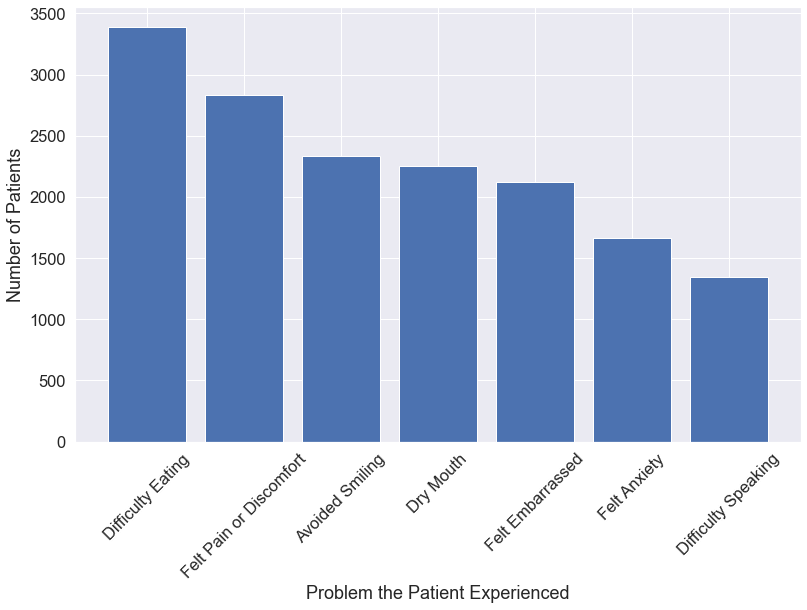

Executing shutdown due to inactivity...


2021-11-19 17:54:52,086 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-11-19 17:55:04,395 - INFO     - Executing shutdown...


In [59]:
plt.bar(problems_df.Problem_Patient_Experienced, problems_df.Number_of_Patients)
plt.xlabel('Problem the Patient Experienced')
plt.xticks(rotation = 45)
plt.ylabel('Number of Patients')
plt.show()

The group presentation is specifying which colors to use ... which I can't control to that extent in plt.  Need to do in sns

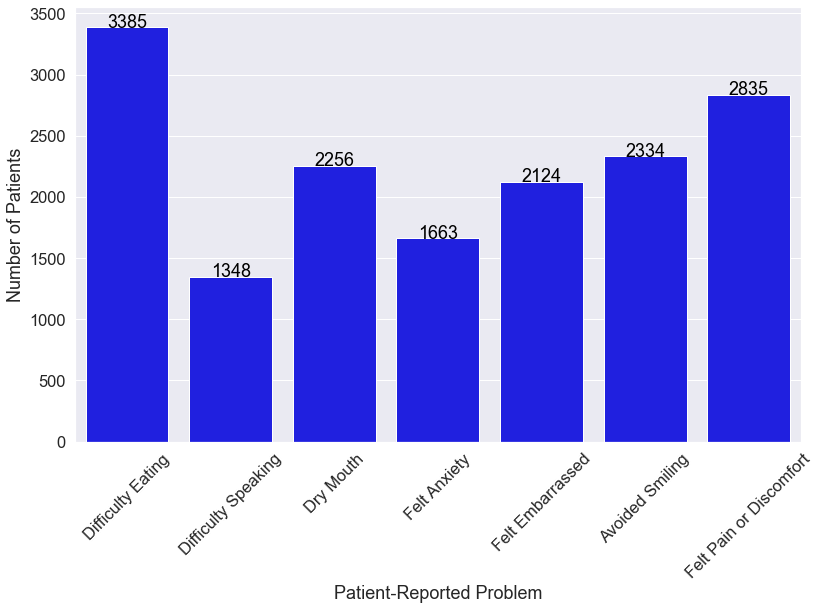

In [94]:
p = sns.barplot(data=problems_df, x='Problem_Patient_Experienced', y='Number_of_Patients', color="blue")
p.set_xticklabels(p.get_xticklabels(),rotation=45)
p.set(xlabel = 'Patient-Reported Problem', ylabel='Number of Patients')
#p.set_title()

for index, row in problems_df.iterrows():
    p.text(row.name,row.Number_of_Patients, round(row.Number_of_Patients,0), color='black',ha='center')
#I don't know why - but it won't work when i organize by descending/ascending order.  Bars move, but numbers stay?

#I also can't get the color palette to work.  Perhaps do manually?  
#Note - changing the color to the desired HEX worked great in paint

In [105]:
#How many times did patients visit the clinics?
#patientcounts

patientcounts

-1          63
 3212379    54
 2441776    43
 2758373    42
 2431132    37
            ..
 2449032     1
 3078387     1
 2533625     1
 3271109     1
 4491936     1
Name: patient_id, Length: 10711, dtype: int64

In [100]:
patientcounts.describe()

count    10711.000000
mean         5.393334
std          4.695309
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         63.000000
Name: patient_id, dtype: float64

In [104]:
visits_df = pd.DataFrame(patientcounts,columns = ['Patient_ID','Number_of_Visits'])
visits_df.head()

,Patient_ID,Number_of_Visits


Okay - I cannot think of how to convert this to a DF ... So I'm going to do this badly.  
Export to csv.  
Edit csv in excel to get column titles.
reimport csv as df.  
It's not good - but i think it will work.

Note - since i was already being bad, went ahead and deleted row patient id = -1.  Can do it in python ... but why?

In [107]:
patientcounts.to_csv('../data/patientcounts.csv')

In [108]:
patientcounts = pd.read_csv('../data/patientcounts.csv')

In [109]:
patientcounts.head()

,patient_id,number_of_visits
0,3212379,54
1,2441776,43
2,2758373,42
3,2431132,37
4,2416076,35


In [47]:
#d=dtale.show(problems2)
#d.open_browser()